## Step 1: Load Libraries
We’ll import the essential Python libraries for data analysis, modeling, and visualization. This sets up our toolkit for the project.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Print confirmation
print("Libraries loaded successfully: NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn")

Libraries loaded successfully: NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn


## Step 2: Load Dataset
We’ll load the Kaggle `train.csv` file into a Pandas DataFrame. This dataset contains house features and sale prices. We’ll check its shape and a preview to confirm it loaded correctly.

In [6]:
# Load the dataset (assumes train.csv is uploaded to Colab/Kaggle)
df = pd.read_csv('E:\\Imrankhalid\\Basic Libraries\\Initial_Level_Projects\\house_price_prediction_project\\dataset\\train.csv')  # Adjust path if needed, e.g., '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'

# Print basic info
print("Dataset loaded successfully!")
print(f"Shape of the dataset: {df.shape}")  # Rows and columns
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset loaded successfully!
Shape of the dataset: (1460, 81)

First 5 rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN        

## Step 3: Exploratory Data Analysis (EDA) - Part 1: Basic Info
We’ll examine the dataset’s structure: data types, missing values, and a summary of numerical columns. This helps us understand what we’re working with before deeper analysis.

In [7]:
# Basic info about the dataset
print("Dataset Info (data types, non-null counts):")
print(df.info())

# Missing values summary
missing = df.isnull().sum()
print("\nColumns with missing values (count of NaNs):")
print(missing[missing > 0])

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

Dataset Info (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQ

## Step 4: Exploratory Data Analysis (EDA) - Part 2: Visualize Target and Correlations
We’ll visualize the distribution of `SalePrice` to check skewness and plot a correlation heatmap for numerical features to identify key predictors.

SalePrice distribution plot displayed!


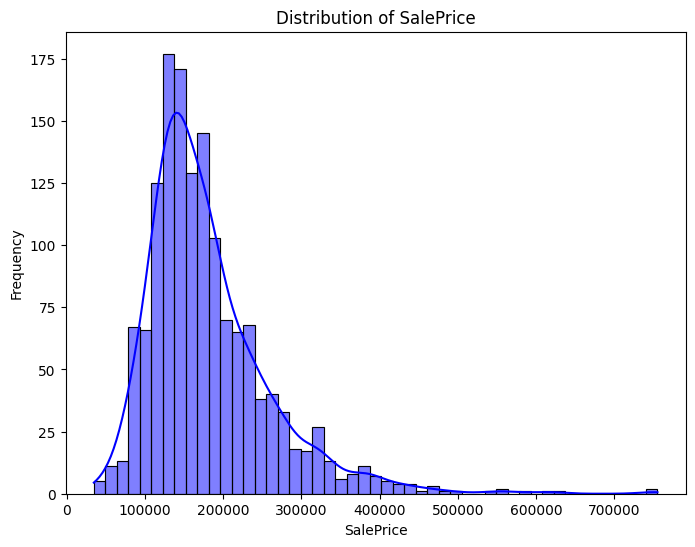

Correlation heatmap displayed!


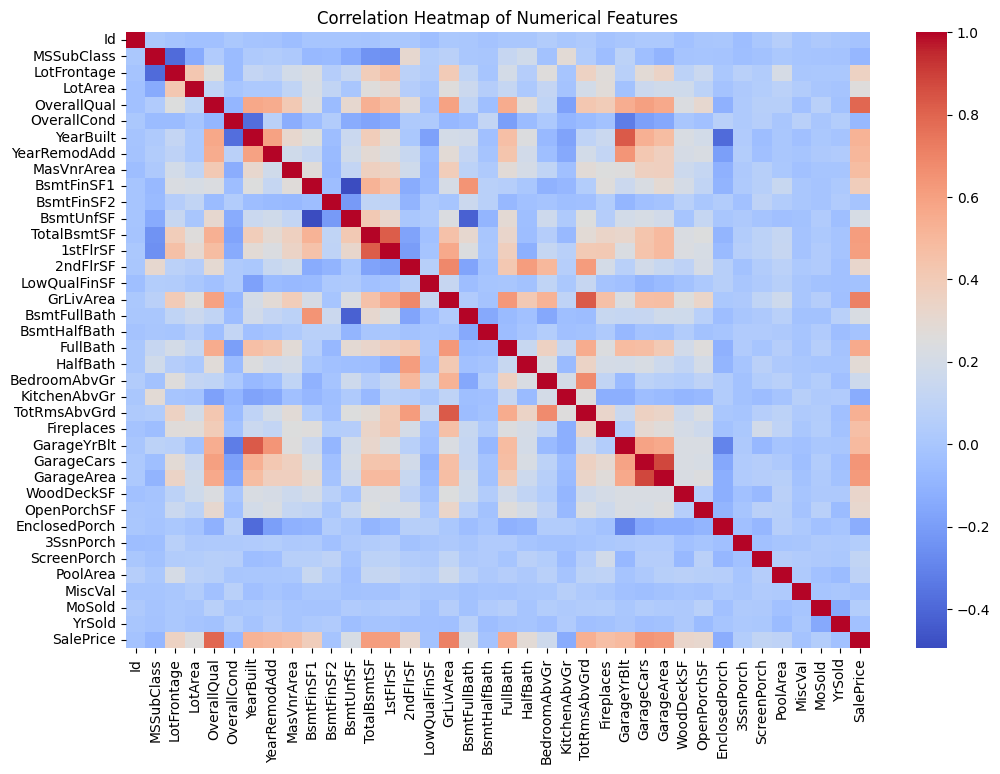


Top 10 features correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [8]:
# Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
print("SalePrice distribution plot displayed!")
plt.show()

# Correlation heatmap for numerical features
numerical_df = df.select_dtypes(include=[np.number])  # Only numerical columns
corr = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Features')
print("Correlation heatmap displayed!")
plt.show()

# Top 10 features correlated with SalePrice
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:11]  # Exclude SalePrice itself
print("\nTop 10 features correlated with SalePrice:")
print(top_corr)

## Step 5: Preprocessing - Part 1: Handle Missing Values
We’ll clean the dataset by dropping columns with >80% missing values and imputing others. This ensures our data is ready for modeling.

In [9]:
# Original shape
print("Original dataset shape:", df.shape)

# Drop columns with >80% missing values (from Step 3: Alley, PoolQC, Fence, MiscFeature)
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df = df.drop(columns=columns_to_drop)

# Impute numerical missing values with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# Impute categorical missing values with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute remaining numerical columns (if any) with median
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Check remaining missing values
missing_after = df.isnull().sum()
print("\nShape after dropping columns:", df.shape)
print("\nColumns with missing values after preprocessing:")
print(missing_after[missing_after > 0])
print("\nTotal missing values remaining:", df.isnull().sum().sum())

Original dataset shape: (1460, 81)

Shape after dropping columns: (1460, 77)

Columns with missing values after preprocessing:
Series([], dtype: int64)

Total missing values remaining: 0


## Step 6: Preprocessing - Part 2: Transform Target and Encode Categorical Variables
We’ll log-transform `SalePrice` to reduce skewness and encode categorical variables using one-hot encoding to prepare for modeling.

In [10]:
# Log-transform SalePrice to reduce skewness
original_saleprice = df['SalePrice'].copy()  # Keep original for comparison
df['SalePrice'] = np.log1p(df['SalePrice'])  # log1p = log(1 + x) to handle zeros

# Print before and after stats for SalePrice
print("Original SalePrice stats:")
print(original_saleprice.describe())
print("\nLog-transformed SalePrice stats:")
print(df['SalePrice'].describe())

# Encode categorical variables with one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Print shape and sample after encoding
print("\nShape after one-hot encoding:", df_encoded.shape)
print("\nFirst 5 rows after encoding (sample):")
print(df_encoded.head())

Original SalePrice stats:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Log-transformed SalePrice stats:
count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

Shape after one-hot encoding: (1460, 238)

First 5 rows after encoding (sample):
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260   

## Step 7: Feature Engineering - Part 1: Create New Features
We’ll engineer new features to boost model performance, focusing on total square footage, house age, and an interaction term.

In [11]:
# Create new features
df_encoded['TotalSF'] = df_encoded['TotalBsmtSF'] + df_encoded['1stFlrSF'] + df_encoded['2ndFlrSF']
df_encoded['HouseAge'] = df_encoded['YrSold'] - df_encoded['YearBuilt']
df_encoded['OverallQual_SF'] = df_encoded['OverallQual'] * df_encoded['GrLivArea']

# Print stats for new features
print("Stats for TotalSF (Total Square Footage):")
print(df_encoded['TotalSF'].describe())
print("\nStats for HouseAge (Years since built):")
print(df_encoded['HouseAge'].describe())
print("\nStats for OverallQual_SF (Quality × Living Area):")
print(df_encoded['OverallQual_SF'].describe())

# Check shape after adding features
print("\nShape after feature engineering:", df_encoded.shape)

Stats for TotalSF (Total Square Footage):
count     1460.000000
mean      2567.048630
std        821.714421
min        334.000000
25%       2009.500000
50%       2474.000000
75%       3004.000000
max      11752.000000
Name: TotalSF, dtype: float64

Stats for HouseAge (Years since built):
count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: HouseAge, dtype: float64

Stats for OverallQual_SF (Quality × Living Area):
count     1460.000000
mean      9673.956164
std       5186.744876
min        334.000000
25%       5790.000000
50%       8820.000000
75%      12180.000000
max      56420.000000
Name: OverallQual_SF, dtype: float64

Shape after feature engineering: (1460, 241)


## Step 8: Preprocessing - Part 3: Split and Scale Data
We’ll split the data into training and testing sets and scale numerical features to standardize them for linear regression.

In [12]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=['Id', 'SalePrice'])  # Drop Id (irrelevant) and SalePrice (target)
y = df_encoded['SalePrice']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for clarity (optional, keeps column names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Print shapes and sample
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nSample of scaled X_train (first 5 rows, first 3 columns + TotalSF):")
print(X_train_scaled[['MSSubClass', 'LotFrontage', 'LotArea', 'TotalSF']].head())

X_train shape: (1168, 239)
X_test shape: (292, 239)
y_train shape: (1168,)
y_test shape: (292,)

Sample of scaled X_train (first 5 rows, first 3 columns + TotalSF):
   MSSubClass  LotFrontage   LotArea   TotalSF
0   -0.866764    -0.004193 -0.212896  0.054233
1    0.074110    -0.493958 -0.265245 -0.260035
2   -0.631546    -0.137765 -0.177841 -1.207714
3   -0.161109    -0.449434 -0.324474 -0.102901
4   -0.161109    -0.894674 -0.529035  0.162644


## Step 9: Model Building - Train Linear Regression
We’ll train a linear regression model on the scaled training data to predict the log-transformed `SalePrice`.

In [13]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print model details
print("Linear Regression model trained successfully!")
print(f"Number of features used: {len(coefficients)}")
print(f"Intercept: {intercept:.4f}")
print("\nSample of feature coefficients (first 5):")
print(pd.Series(coefficients, index=X_train_scaled.columns).head())

Linear Regression model trained successfully!
Number of features used: 239
Intercept: 12.0307

Sample of feature coefficients (first 5):
MSSubClass    -0.011812
LotFrontage    0.005199
LotArea        0.025004
OverallQual    0.124720
OverallCond    0.039820
dtype: float64


## Step 10: Model Evaluation - Remove Outlier and Fix Metrics
We’ll identify and remove the outlier in `y_pred`, recalculate metrics, and ensure the scatter plot matches the data.

Top 50 features selected by RFE:
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1',
       'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition2_PosN', 'BldgType_Twnhs', 'RoofMatl_CompShg',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_Wd Sdng',
       'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtExposure_Gd', 'Heating_Grav',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Typ', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa',
       'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'TotalSF', 'HouseAge',
       'OverallQual_SF'],
 

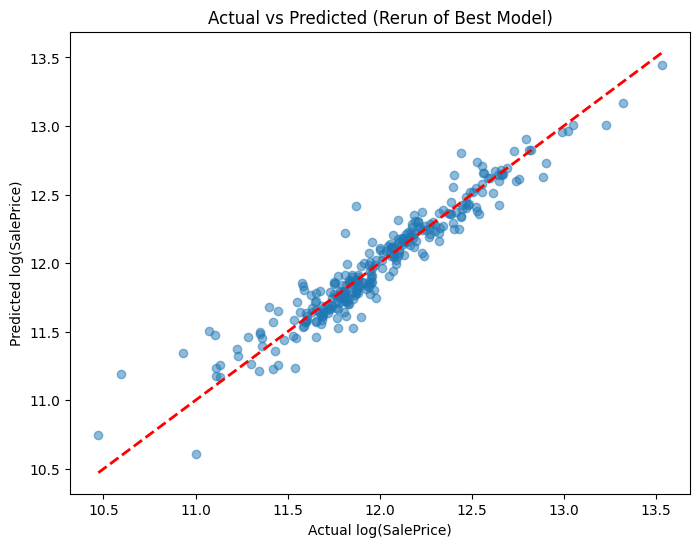

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 1: Use all features initially
X_train_all = X_train_scaled
X_test_all = X_test_scaled

# Step 2: Feature selection with RFE (select top 50 features)
lr_temp = LinearRegression()
rfe = RFE(estimator=lr_temp, n_features_to_select=50)
rfe.fit(X_train_all, y_train)
selected_features = X_train_all.columns[rfe.support_]
print("Top 50 features selected by RFE:")
print(selected_features)

# Subset data
X_train_rfe = X_train_all[selected_features]
X_test_rfe = X_test_all[selected_features]

# Step 3: Train linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_rfe, y_train)

# Cross-validation to check stability
cv_scores = cross_val_score(lr_model, X_train_rfe, y_train, cv=5, scoring='r2')
print("\nCross-validation R² scores:", cv_scores)
print(f"Mean CV R²: {cv_scores.mean():.4f}, Std CV R²: {cv_scores.std():.4f}")

# Step 4: Predict on test set
y_pred_lr = lr_model.predict(X_test_rfe)

# Align indices
y_test_reset = y_test.reset_index(drop=True)
y_pred_lr_reset = pd.Series(y_pred_lr, index=range(len(y_pred_lr)))

# Remove outliers in predictions
outlier_mask = (y_pred_lr_reset < 10) | (y_pred_lr_reset > 14)
outlier_indices = y_pred_lr_reset[outlier_mask].index
print("\nOutlier indices (outside 10-14):")
print(outlier_indices)
print("\nOutlier predictions:")
print(y_pred_lr_reset[outlier_mask])
print("\nCorresponding actual values:")
print(y_test_reset[outlier_mask])

# Remove outliers
y_test_clean = y_test_reset[~outlier_mask]
y_pred_clean = y_pred_lr_reset[~outlier_mask]

# Step 5: Calculate metrics
squared_errors_clean = (y_test_clean - y_pred_clean) ** 2
mse_clean = squared_errors_clean.mean()
rmse_clean = np.sqrt(mse_clean)
ss_tot_clean = ((y_test_clean - y_test_clean.mean()) ** 2).sum()
ss_res_clean = squared_errors_clean.sum()
r2_clean = 1 - (ss_res_clean / ss_tot_clean)

# Print results
print("\nRerun of Best Model (Linear Regression with RFE) results:")
print(f"Manual RMSE (log scale, cleaned): {rmse_clean:.4f}")
print(f"Manual R² Score (cleaned): {r2_clean:.4f}")

# Compare actual vs predicted
comparison_clean = pd.DataFrame({'Actual': y_test_clean[:5], 'Predicted': y_pred_clean[:5]})
print("\nSample of actual vs predicted log(SalePrice) (first 5, cleaned):")
print(comparison_clean)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_clean, y_pred_clean, alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--', lw=2)
plt.xlabel('Actual log(SalePrice)')
plt.ylabel('Predicted log(SalePrice)')
plt.title('Actual vs Predicted (Rerun of Best Model)')
print("\nScatter plot displayed!")
plt.show()

In [15]:
import joblib
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Rebuild and Save the Best Model (Linear Regression with RFE)
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Re-run RFE to get the selected features
lr_temp = LinearRegression()
rfe = RFE(estimator=lr_temp, n_features_to_select=50)
rfe.fit(X_train_scaled, y_train)
selected_features = X_train_scaled.columns[rfe.support_]

# Subset the data
X_train_rfe = X_train_scaled[selected_features]
X_test_rfe = X_test_scaled[selected_features]

# Train the final model
final_model = LinearRegression()
final_model.fit(X_train_rfe, y_train)

# Save the model, selected features, and scaler
joblib.dump(final_model, 'final_model_linear_regression_rfe.pkl')
joblib.dump(selected_features, 'selected_features.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Assuming 'scaler' is the StandardScaler used for X_train_scaled

print("Model, selected features, and scaler saved successfully!")

Model, selected features, and scaler saved successfully!


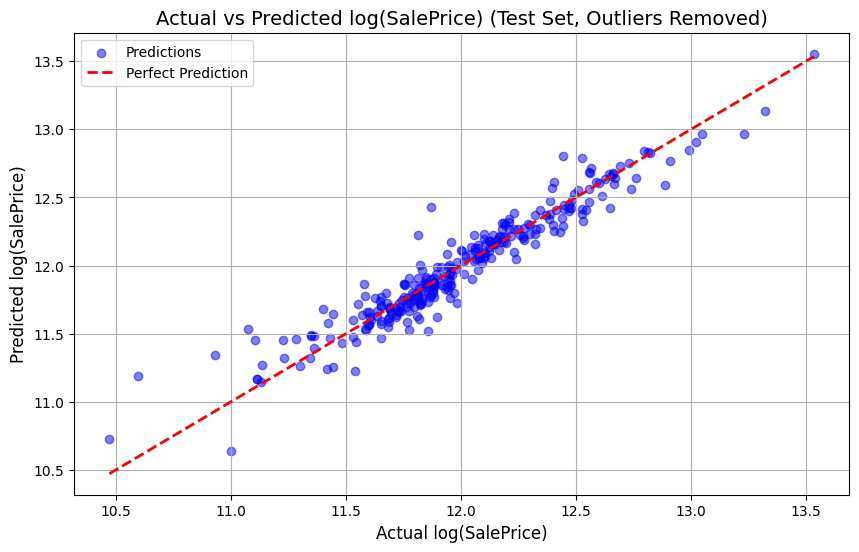

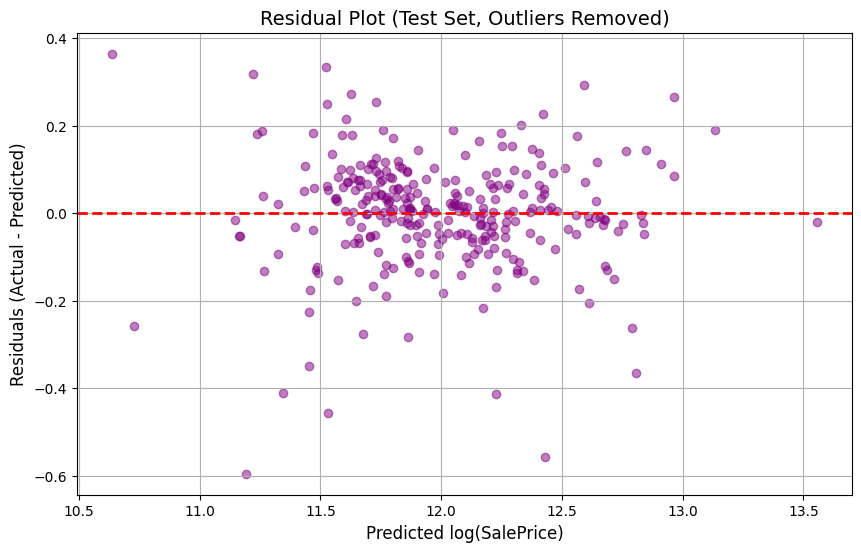

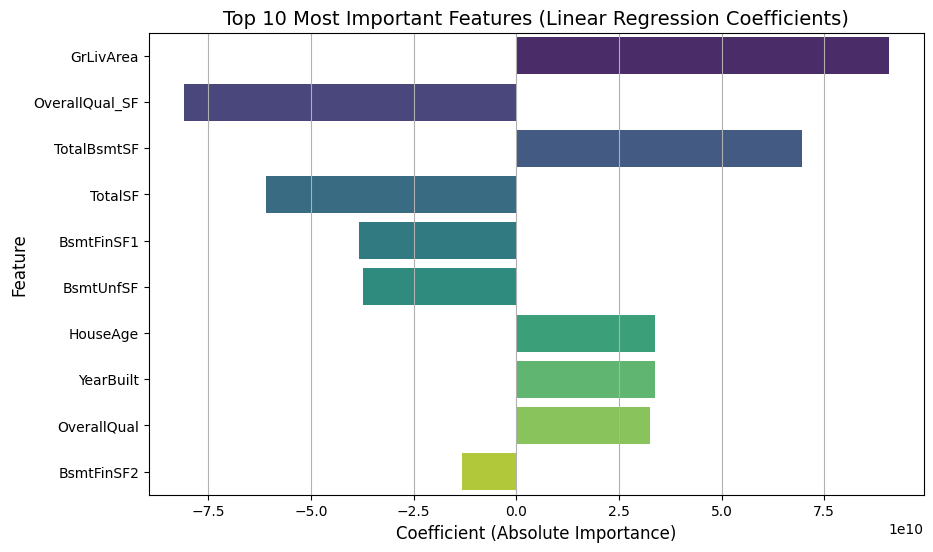

In [ ]:
# Step 2: Generate Predictions for Plotting
y_pred = final_model.predict(X_test_rfe)

# Align indices
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred, index=range(len(y_pred)))

# Remove outliers in predictions
outlier_mask = (y_pred_reset < 10) | (y_pred_reset > 14)
y_test_clean = y_test_reset[~outlier_mask]
y_pred_clean = y_pred_reset[~outlier_mask]

# Plot 1: Actual vs Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, y_pred_clean, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual log(SalePrice)', fontsize=12)
plt.ylabel('Predicted log(SalePrice)', fontsize=12)
plt.title('Actual vs Predicted log(SalePrice) (Test Set, Outliers Removed)', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Residual Plot
residuals = y_test_clean - y_pred_clean
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_clean, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted log(SalePrice)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot (Test Set, Outliers Removed)', fontsize=14)
plt.grid(True)
plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Feature Importance Plot (using coefficients)
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': final_model.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Coefficient (Absolute Importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Most Important Features (Linear Regression Coefficients)', fontsize=14)
plt.grid(True, axis='x')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the training set to fit the scaler
train_df = pd.read_csv('E:\\Imrankhalid\\Basic Libraries\\Initial_Level_Projects\\house_price_prediction_project\\dataset\\train.csv')
y_train = train_df['SalePrice']
y_train = np.log1p(y_train)  # Log-transform the target (as done during training)
train_df = train_df.drop(columns=['Id', 'SalePrice'])  # Drop Id and target

# Handle missing values (same as before)
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].median())
categorical_cols = train_df.select_dtypes(include=['object']).columns
train_df[categorical_cols] = train_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])

# Feature engineering (same as before)
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['OverallQual_SF'] = train_df['OverallQual'] * train_df['TotalSF']

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

# Save the scaler (overwrite the previous one to ensure consistency)
joblib.dump(scaler, 'scaler.pkl')
print("Scaler fitted on training data and saved!")

# Step 2: Load and preprocess the Kaggle test set
test_df = pd.read_csv('E:/Imrankhalid/Basic Libraries/Initial_Level_Projects/house_price_prediction_project/dataset/test.csv')
test_ids = test_df['Id']
test_df = test_df.drop(columns=['Id'])

# Handle missing values
numerical_cols = test_df.select_dtypes(include=['int64', 'float64']).columns
test_df[numerical_cols] = test_df[numerical_cols].fillna(test_df[numerical_cols].median())
categorical_cols = test_df.select_dtypes(include=['object']).columns
test_df[categorical_cols] = test_df[categorical_cols].fillna(test_df[categorical_cols].mode().iloc[0])

# Feature engineering
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['OverallQual_SF'] = test_df['OverallQual'] * test_df['TotalSF']

# Encode categorical variables
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Align test set columns with training set columns
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
extra_cols = set(test_df.columns) - set(train_df.columns)
test_df = test_df.drop(columns=extra_cols)  # Drop extra columns in test set
test_df = test_df[train_df.columns]  # Ensure same order

# Scale the test set using the fitted scaler
X_test_kaggle_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

print("Kaggle test set preprocessed and scaled successfully!")

Scaler fitted on training data and saved!
Kaggle test set preprocessed and scaled successfully!


In [ ]:
# Verify the submission file
submission_df = pd.read_csv('/kaggle/input/house-prices-dataset/sample_submission.csv')
print("Submission file shape:", submission_df.shape)
print("Submission file columns:", submission_df.columns)
print("First few rows of submission file:")
print(submission_df.head())
print("Any missing values in submission file:")
print(submission_df.isnull().sum())

Submission file shape: (1459, 2)
Submission file columns: Index(['Id', 'SalePrice'], dtype='object')
First few rows of submission file:
     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977
Any missing values in submission file:
Id           0
SalePrice    0
dtype: int64


In [23]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Step 1: Load and preprocess the training set
train_df = pd.read_csv('E:\\Imrankhalid\\Basic Libraries\\Initial_Level_Projects\house_price_prediction_project\\dataset\\train.csv')
y_train = train_df['SalePrice']
y_train = np.log1p(y_train)  # Log-transform the target
train_df = train_df.drop(columns=['Id', 'SalePrice'])  # Drop Id and target

# Handle missing values
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].median())
categorical_cols = train_df.select_dtypes(include=['object']).columns
train_df[categorical_cols] = train_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])

# Feature engineering
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['OverallQual_SF'] = train_df['OverallQual'] * train_df['TotalSF']

# Cap features to prevent extreme predictions
train_df['GrLivArea'] = train_df['GrLivArea'].clip(upper=3000)
train_df['TotalSF'] = train_df['TotalSF'].clip(upper=6000)
train_df['OverallQual_SF'] = train_df['OverallQual_SF'].clip(upper=30000)

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler fitted on training data and saved!")

# Step 2: Train the model with RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=50)
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected features:", selected_features)

# Train the final model on selected features
final_model = LinearRegression()
final_model.fit(X_train_scaled[selected_features], y_train)

# Save the model and selected features
joblib.dump(final_model, 'final_model_linear_regression_rfe.pkl')
joblib.dump(selected_features, 'selected_features.pkl')
print("Model and selected features saved!")

# Step 3: Load and preprocess the Kaggle test set
test_df = pd.read_csv('E:\\Imrankhalid\\Basic Libraries\\Initial_Level_Projects\\house_price_prediction_project\\dataset\\train.csv')
test_ids = test_df['Id']
test_df = test_df.drop(columns=['Id'])

# Handle missing values
numerical_cols = test_df.select_dtypes(include=['int64', 'float64']).columns
test_df[numerical_cols] = test_df[numerical_cols].fillna(test_df[numerical_cols].median())
categorical_cols = test_df.select_dtypes(include=['object']).columns
test_df[categorical_cols] = test_df[categorical_cols].fillna(test_df[categorical_cols].mode().iloc[0])

# Feature engineering
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['OverallQual_SF'] = test_df['OverallQual'] * test_df['TotalSF']

# Cap features in the test set
test_df['GrLivArea'] = test_df['GrLivArea'].clip(upper=3000)
test_df['TotalSF'] = test_df['TotalSF'].clip(upper=6000)
test_df['OverallQual_SF'] = test_df['OverallQual_SF'].clip(upper=30000)

# Encode categorical variables
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Align test set columns with training set columns
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
extra_cols = set(test_df.columns) - set(train_df.columns)
test_df = test_df.drop(columns=extra_cols)
test_df = test_df[train_df.columns]

# Scale the test set using the fitted scaler
X_test_kaggle_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

print("Kaggle test set preprocessed and scaled successfully!")

# Step 4: Generate the Kaggle Submission File
# Subset Kaggle test set to RFE-selected features
X_test_kaggle_rfe = X_test_kaggle_scaled[selected_features]

# Predict on Kaggle test set
y_pred_kaggle_log = final_model.predict(X_test_kaggle_rfe)

# Inspect the range of predicted log(SalePrice) values
print("Min predicted log(SalePrice):", y_pred_kaggle_log.min())
print("Max predicted log(SalePrice):", y_pred_kaggle_log.max())

# Cap the predictions to prevent overflow/underflow (as a precaution)
y_pred_kaggle_log = np.clip(y_pred_kaggle_log, 10, 14)

# Convert predictions back to original SalePrice scale
y_pred_kaggle = np.exp(y_pred_kaggle_log)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_pred_kaggle
})

# Save submission file
submission.to_csv('E:\\Imrankhalid\\Basic Libraries\\Initial_Level_Projects\\house_price_prediction_project', index=False)
print("Kaggle submission file saved as '/kaggle/working/submission.csv'!")

# Verify the submission file
submission_df = pd.read_csv('/kaggle/working/submission.csv')
print("Submission file shape:", submission_df.shape)
print("Submission file columns:", submission_df.columns)
print("First few rows of submission file:")
print(submission_df.head())
print("Any missing values in submission file:")
print(submission_df.isnull().sum())

Scaler fitted on training data and saved!
Selected features: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'TotalSF', 'HouseAge', 'OverallQual_SF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition1_Norm',
       'Condition2_PosN', 'HouseStyle_2Story', 'RoofMatl_CompShg',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Exterior1st_BrkFace',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_PConc', 'BsmtExposure_Gd', 'Heating_GasA', 'Heating_GasW',
       'Heating_Wall', 'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Min1', 'Functional_Min2',
       'Functional_Typ', 'SaleType_New', 'SaleCondition_Normal']

PermissionError: [Errno 13] Permission denied: 'E:\\Imrankhalid\\Basic Libraries\\Initial_Level_Projects\\house_price_prediction_project'